# Timeseries

-   data sources in the cloud,
-   reindexing
-   manipulating timeseries:
        -   read documentation
        -   search for solutions
        -   LLM

pandas dataframe-->timeseries

-   get data into dataframe
-   convert the appropriate column into time-series. 

In [1]:
import pandas as pd

There is a lot of useful datasets at datahub.io

In [5]:
df = pd.read_csv('co2.csv')
df.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99
1958-06,1958.4548,317.27,315.15,-1,-9.99,-0.99
1958-07,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [6]:
# skip first row and put in own names

names = ['Date', 'DD', 'Ave', 'Interpolated', 'Trend', 'Days', 'extra']
df = pd.read_csv('co2.csv', header=None, skiprows=1, names=names)
df.head()

,Date,DD,Ave,Interpolated,Trend,Days,extra
0,1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958-06,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958-07,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [9]:
df['Date']

0      1958-03
1      1958-04
2      1958-05
3      1958-06
4      1958-07
        ...   
795    2024-06
796    2024-07
797    2024-08
798    2024-09
799    2024-10
Name: Date, Length: 800, dtype: object

datatype=object, want it to be datetime object

In [10]:
pd.to_datetime(df['Date'])

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
799   2024-10-01
Name: Date, Length: 800, dtype: datetime64[ns]

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
799   2024-10-01
Name: Date, Length: 800, dtype: datetime64[ns]

## Seaborn
plotting package based on matplotlib. built into pandas

<Axes: xlabel='Date', ylabel='Ave'>

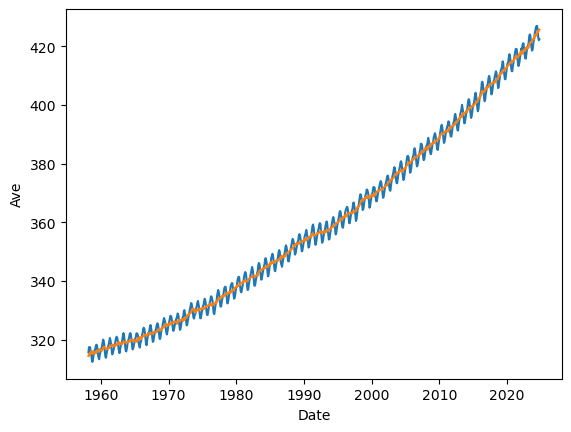

In [13]:
import seaborn as sns

sns.lineplot(x='Date', y='Ave', data=df)
sns.lineplot(x='Date', y='Interpolated', data=df)

<Axes: xlabel='Date', ylabel='Ave'>

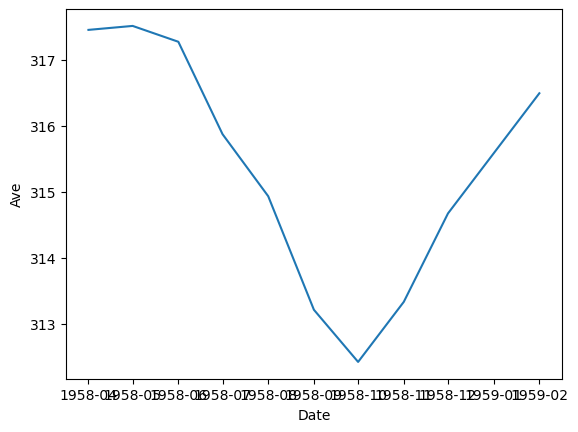

In [17]:
sns.lineplot(x='Date', y='Ave', data=df.iloc[1:12])

co2 is higher in winter, less growth of plants and burning more fossil fuels in winter. 

# Irish Data: 

-   data.gov.ie for lots of datasets
-   knock airport weather. 

-   
-    need to ignore first few rows. need to skip to row 20. skip first 19. 
-   date isnt in nice format. change to datetime to manipulate it. 


In [19]:
df=pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv', skiprows=19)

In [20]:
df.head()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,
3,1996,12,3.1,10.7,-4.0,5.2,1.1,,-5.3,9.4,48,
4,1997,1,3.4,10.7,-3.9,5.2,1.6,26.0,-5.2,8.0,40,42.1


In [21]:
pd.to_datetime(df['year', 'month'])

KeyError: ('year', 'month')

doesnt work . need to make a new column called day

In [ ]:
# new column called day with value 1

df['day']=1
df.head()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1
3,1996,12,3.1,10.7,-4.0,5.2,1.1,,-5.3,9.4,48,,1
4,1997,1,3.4,10.7,-3.9,5.2,1.6,26.0,-5.2,8.0,40,42.1,1


In [ ]:
# create new column called Date with year, month, day columns

df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['Date'] 

0     1996-08-01
1     1996-10-01
2     1996-11-01
3     1996-12-01
4     1997-01-01
         ...    
334   2024-07-01
335   2024-08-01
336   2024-09-01
337   2024-10-01
338   2024-11-01
Name: Date, Length: 339, dtype: datetime64[ns]

<Axes: xlabel='Date', ylabel='meant'>

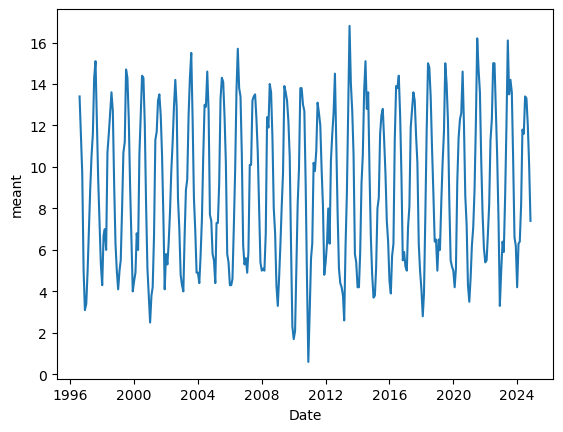

In [ ]:
# temperatures as they go across each year

sns.lineplot(x='Date', y='meant', data=df)

if you want to do manipulation on this, check out the min, rolling averages etc. its better that the index is of type date. 

### Setting the index to datetime:

if you would like to do some analysis on the data based on time, you should set the index of the dataframe to be the date. 

In [ ]:
df.set_index('Date', inplace=True)  # set Date as index. inplace=True means change the dataframe in place
df.head()


,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
Date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1
1996-12-01,1996,12,3.1,10.7,-4.0,5.2,1.1,,-5.3,9.4,48,,1
1997-01-01,1997,1,3.4,10.7,-3.9,5.2,1.6,26.0,-5.2,8.0,40,42.1,1


#### *lets look at one year*

```loc``` gets the rols that match the indexes value. 

<Axes: xlabel='Date', ylabel='meant'>

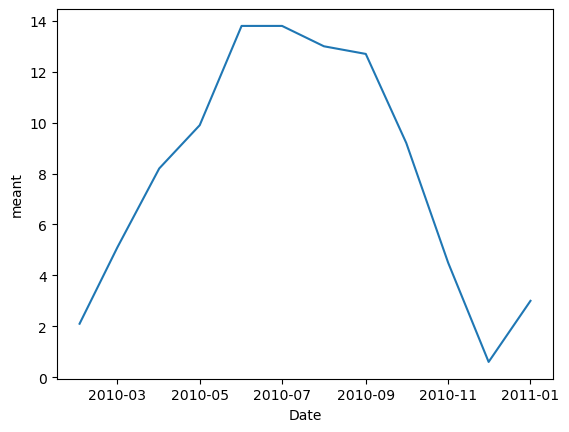

In [31]:
dateFrom = '2010-01-01 01:00:00'
dateTo = '2011-01-01 01:00:00'
sns.lineplot(data=df.loc[dateFrom:dateTo], x='Date', y='meant')

# one year temperature at knock airport. 


loc is values of the index, iloc looks at the row or column number. 


<Axes: xlabel='Date', ylabel='meant'>

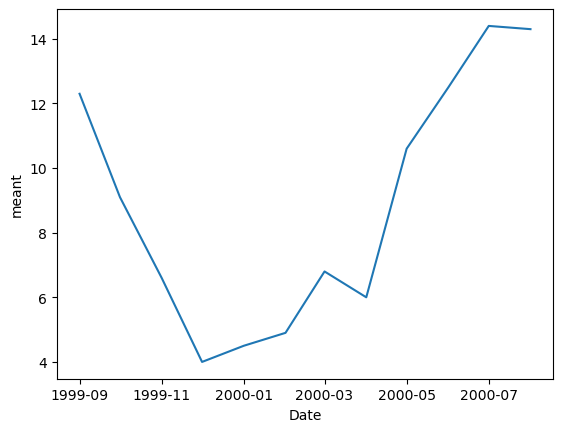

In [33]:
sns.lineplot(data=df.iloc[36:48], x='Date', y='meant') 

# rows 36 to 48 are for knock airport for 2010


### Get the mean temperature 
-   for that period of time, 2010
-   ie select row and column
-   *NOTE:* Be careful taking the maen of a mean or percentage, this can cause unsound date. 

In [34]:
# get mean temperature over that period of time

dateFrom = '2010-01-01 01:00:00'
dateTo = '2011-01-01 01:00:00'
df.loc[dateFrom:dateTo]['meant'].mean()

7.991666666666666

# Resample: 

-   if want to get average of each year can resample this. check doc's
-   resample ie break up into chunks.
-   eg: plot the average temperatures each year. 

In [35]:
df['meant'].resample('1y').mean()

C:\Users\louis\AppData\Local\Temp\ipykernel_18932\2743945124.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df['meant'].resample('1y').mean()


Date
1996-12-31    7.800000
1997-12-31    9.150000
1998-12-31    8.808333
1999-12-31    8.791667
2000-12-31    8.600000
2001-12-31    8.475000
2002-12-31    8.875000
2003-12-31    9.008333
2004-12-31    8.925000
2005-12-31    9.100000
2006-12-31    9.066667
2007-12-31    9.433333
2008-12-31    8.691667
2009-12-31    8.650000
2010-12-31    7.883333
2011-12-31    8.850000
2012-12-31    8.616667
2013-12-31    8.625000
2014-12-31    9.200000
2015-12-31    8.400000
2016-12-31    8.941667
2017-12-31    9.158333
2018-12-31    8.833333
2019-12-31    9.000000
2020-12-31    8.883333
2021-12-31    9.266667
2022-12-31    9.441667
2023-12-31    9.875000
2024-12-31    9.518182
Freq: YE-DEC, Name: meant, dtype: float64

you can use ```rolling``` to provide rolling calculations. (eg averages)

C:\Users\louis\AppData\Local\Temp\ipykernel_18932\3719753356.py:3: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sns.lineplot(data=df['meant'].resample('1y').mean())


<Axes: xlabel='Date', ylabel='meant'>

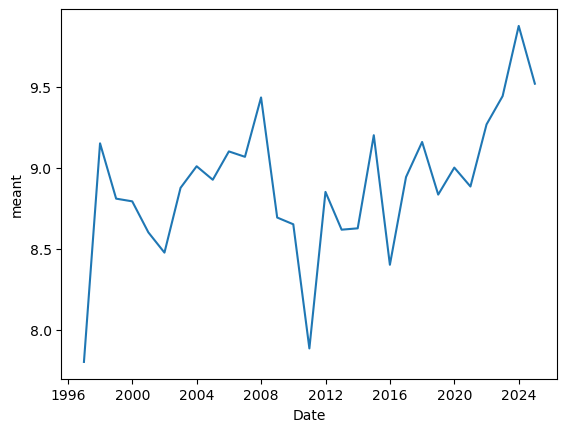

In [36]:
# line plot of mean temperature over 1 year

sns.lineplot(data=df['meant'].resample('1y').mean())


rolling averages over 12 months--> rolling()

## Aggregation: 
-   agg()
-   instead of just doing the mean() you can do multiple operations (even have your own lambda functions.)

In [37]:
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
Date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1


In [45]:
rs = df.resample('1y') # resample data by year 

# add datetime object to the index

rs = df.resample('1y').mean()
rs.head()



C:\Users\louis\AppData\Local\Temp\ipykernel_18932\2363858210.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rs = df.resample('1y') # resample data by year
C:\Users\louis\AppData\Local\Temp\ipykernel_18932\2363858210.py:5: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rs = df.resample('1y').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [44]:
rs.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [46]:
rs['meant'].agg(['mean', 'std', 'min', 'max'])


,mean,std,min,max
Date,,,,
1996-12-31,7.800000,4.651165,3.1,13.4
1997-12-31,9.150000,3.719360,3.4,15.1
1998-12-31,8.808333,3.312911,4.3,13.6
1999-12-31,8.791667,3.846003,4.0,14.7
2000-12-31,8.600000,3.971947,3.8,14.4
2001-12-31,8.475000,4.107228,2.5,13.5
2002-12-31,8.875000,3.265557,4.8,14.2
2003-12-31,9.008333,3.907675,4.0,15.5
2004-12-31,8.925000,3.618670,4.4,14.6


# Conclusion:

-   check doc's
-   copilot/chatgpt
-   google   

***